In [26]:
import numpy as np
%display latex

x, t = var('x', 't')
Psi = var('Psi')
A = var('A')
w = var('w', latex_name=r'\omega')
l = var('l', latex_name=r'\lambda')
assume(l>0, A>0, w>0)
assume(t, 'real')

eq0 = Psi == A*e^(-l*abs(x))*e^(-I*w*t)
show(eq0)

Psi == A*e^(-I*t*w - l*abs(x))

(a): Normalize the Wavefunction.

In [27]:
eq1 = eq0.lhs()*eq0.lhs().conjugate() == eq0.rhs()*eq0.rhs().conjugate() # define absolute value of Psi as new Equation
show(eq1)
show(eq1.lhs().integral(x, -infinity, infinity, hold=True), r' = ', 1) #show normalization condition
norm = (eq1.rhs()).integral(x, -infinity, infinity) == 1 #solve Integral
show(norm)
eqA = solve(norm, A)[0] #solve for A
show(eqA)

Psi*conjugate(Psi) == A^2*e^(-2*l*abs(x))

integrate(Psi*conjugate(Psi), x, -Infinity, +Infinity) ' = ' 1

A^2/l == 1

A == sqrt(l)

In [32]:
eq0 = eq0.subs(eqA)
eq1 = eq1.subs(eqA)
display(eq0) #substitute A into wave function

Psi == sqrt(l)*e^(-I*t*w - l*abs(x))

(b): Determine the expectation values of $x$ and $x^2$

In [37]:
eqx1 = x*eq1
show(LatexExpr(r'\langle x\rangle ='),eqx1.rhs().integral(x, -infinity, infinity, hold=True))
x1 = eqx1.rhs().integral(x, -infinity, infinity)
show(LatexExpr(r'\langle x\rangle ='),x1)

\langle x\rangle = integrate(l*x*e^(-2*l*abs(x)), x, -Infinity, +Infinity)

\langle x\rangle = 0

In [41]:
eqx2 = x^2*eq1
show(LatexExpr(r'\langle x^2\rangle ='),eqx2.rhs().integral(x, -infinity, infinity, hold=True))
x2 = eqx2.rhs().integral(x, -infinity, infinity)
show(LatexExpr(r'\langle x^2\rangle ='),x2)

\langle x^2\rangle = integrate(l*x^2*e^(-2*l*abs(x)), x, -Infinity, +Infinity)

\langle x^2\rangle = 1/2/l^2

In [44]:
sigma = var('sigma')
eqs = sigma == sqrt(x2-x1^2) #The standard deviation
show(sigma, LatexExpr(r' = \sqrt{\langle x^2\rangle - \langle x\rangle^2}'))
show(eqs.full_simplify())

sigma  = \sqrt{\langle x^2\rangle - \langle x\rangle^2}

sigma == 1/2*sqrt(2)/l

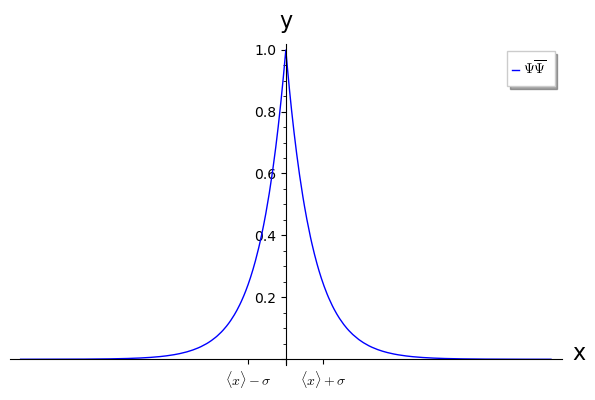

In [56]:
l_val = 1  #choose value for lambda
w_val = pi #choose value for omega
t_val = 0  #time 0

x_marks = [x1,x1-eqs.rhs()(l=l_val), x1+eqs.rhs()(l=l_val)] #markers for mean + or - standard deviation
x_marks = [float(i) for i in x_marks]
P = plot(eq1.rhs()(l=l_val, w=w_val), (-5,5), legend_label=r"$%s$"%latex(eq1.lhs()), axes_labels=['x','y'], ticks=[x_marks,None], tick_formatter=[[r"$\langle x\rangle$", r"$\langle x\rangle-\sigma$", r"$\langle x\rangle+\sigma$"], None])
P

In [ ]:
l_val = 1  #choose value for lambda
w_val = pi #choose value for omega
t_val = .25  #time 0

x_marks = [x1,x1-eqs.rhs()(l=l_val), x1+eqs.rhs()(l=l_val)] #markers for mean + or - standard deviation
x_marks = [float(i) for i in x_marks]
P = plot(eq0.rhs().real()(l=l_val, w=w_val, t=t_val), (-5,5), legend_label=r"$%s$"%latex(eq0.lhs()), axes_labels=['x','y'], ticks=[x_marks,None], tick_formatter=[[r"$\langle x\rangle$", r"$\langle x\rangle-\sigma$", r"$\langle x\rangle+\sigma$"], None], color = 'blue')
P += plot(eq0.rhs().imag()(l=l_val, w=w_val, t=t_val), (-5,5), color = 'orange', legend_label=r"$%s$"%latex(eq0.lhs()) + ' Imaginary')
P